# The long wait

* [Libraries ](#Libraries)
* [Data loading, visualization and exploratory analysis](#data)
* [Modeling](#Modeling)
    * [Baseline](#Baseline)
    * [Logistic Regression](#Logistic-Regression)
    * [Decision Tree](#Decision-Tree-Classifier)
    * [Random Forest](#Random-Forest-Classifier)
    * [AdaBoost](#AdaBoost-Classifier)
    * [Neural network model with Keras](#nn)
* [Summary](#Summary)



# Libraries <a id='Libraries'></a>

In [82]:
#The bread and butter:
import pandas as pd
import numpy as np

#Visualizations:
import matplotlib.pyplot as plt
import seaborn as sb

#Statistics:
import scipy.stats as stats

#ML:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, precision_score,recall_score
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.models import Sequential
from keras.utils import to_categorical


# Data loading, visualization and exploratory analysis <a id='data'></a>

Data consists of all January 2019 flights downloaded from Kaggle.

In [3]:
path19 = 'https://raw.githubusercontent.com/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/master/Jan_2019_ontime.csv'
df19 = pd.read_csv(path19)

In [4]:
df19 = df19.drop('Unnamed: 21', axis = 1)

In [5]:
print(df19.shape)
print(df19.describe())
print(df19.dtypes)

(583985, 21)
        DAY_OF_MONTH    DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  \
count  583985.000000  583985.000000          583985.000000      583985.000000   
mean       15.960088       3.835626           19983.213168        2537.869334   
std         8.987942       1.921899             377.724638        1821.736145   
min         1.000000       1.000000           19393.000000           1.000000   
25%         8.000000       2.000000           19790.000000         979.000000   
50%        16.000000       4.000000           19977.000000        2114.000000   
75%        24.000000       5.000000           20368.000000        3902.000000   
max        31.000000       7.000000           20452.000000        7439.000000   

       ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  DEST_AIRPORT_ID  \
count      583985.000000           5.839850e+05    583985.000000   
mean        12659.701982           1.265974e+06     12659.470015   
std          1519.405493           1.519403e+05      

In [6]:
# Number of NaN values in df for each column
df19.isna().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [7]:
# dropped NaN values in df
df19 = df19.dropna()
print(df19.shape)

(565963, 21)


In [9]:
# Number of Unique elements in df
df19.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5441
OP_CARRIER_FL_NUM        6833
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1451
dtype: int64

In [10]:
#Remove columns which won't be used
df_red = df19.drop([ 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME',
       'CANCELLED','ARR_TIME',
       'DIVERTED'], axis = 1)

In [11]:
df_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
0,1,2,9E,GNV,ATL,0.0,0600-0659,0.0,300.0
1,1,2,9E,MSP,CVG,0.0,1400-1459,0.0,596.0
2,1,2,9E,DTW,CVG,0.0,1200-1259,0.0,229.0
3,1,2,9E,TLH,ATL,0.0,1500-1559,0.0,223.0
4,1,2,9E,ATL,FSM,0.0,1900-1959,0.0,579.0


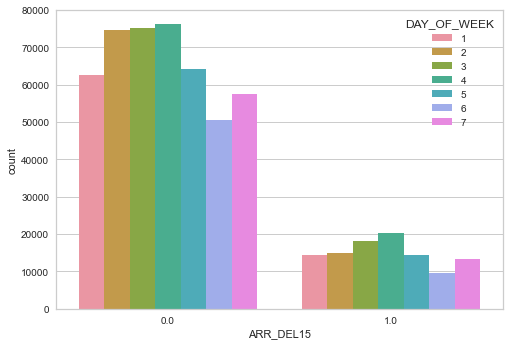

In [12]:
#all delayed flights by weekday
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DAY_OF_WEEK'])

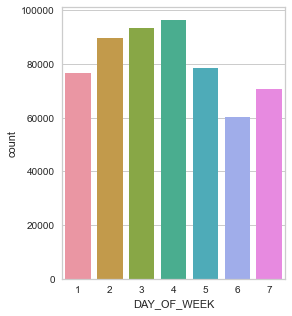

In [13]:
#all flights per day
f, ax = plt.subplots()
sb.countplot(x = df_red['DAY_OF_WEEK'])
f.set_size_inches(4,5)

Seems like we need to normalize the delayed flights per day to the total number of flights per day

Text(0, 0.5, 'Fraction of flights delayed')

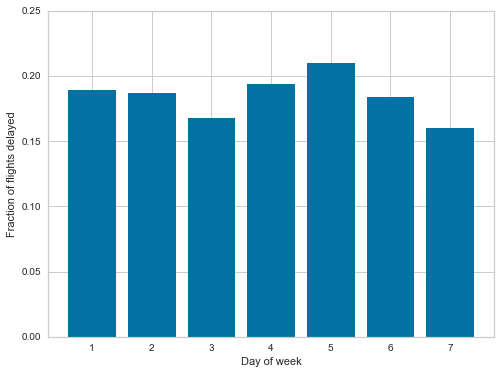

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6))
plt.bar(x = df_red['DAY_OF_WEEK'].unique(), height = df_red.groupby(['DAY_OF_WEEK'])['ARR_DEL15'].mean())
plt.ylim([0, 0.25])
plt.xlabel('Day of week')
plt.ylabel('Fraction of flights delayed')

As can be seen the fraction of flights delayed per day looks different from the total delayed flights. Highest proportion is day 5 as opposed to day 4 in raw total numbers

Text(0, 0.5, 'Fraction of flights delayed')

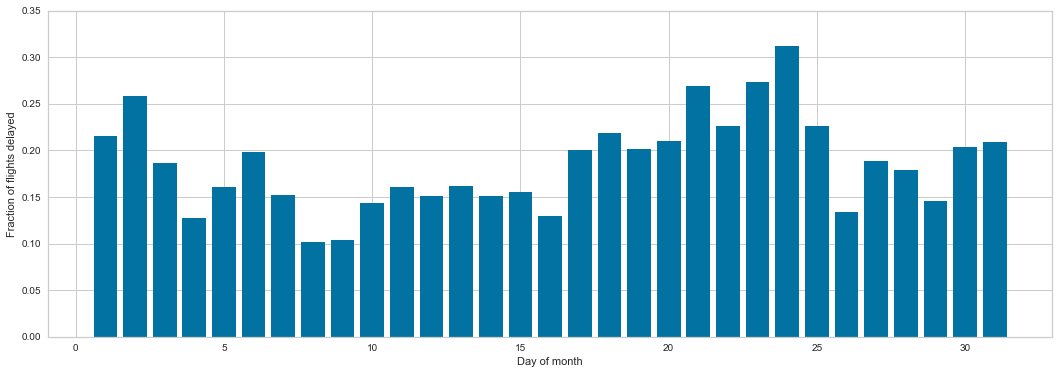

In [30]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['DAY_OF_MONTH'].unique(), height = df_red.groupby(['DAY_OF_MONTH']).mean()['ARR_DEL15'])
plt.ylim([0, 0.35])
plt.xlabel('Day of month')
plt.ylabel('Fraction of flights delayed')

Text(0, 0.5, 'Fraction of flights delayed')

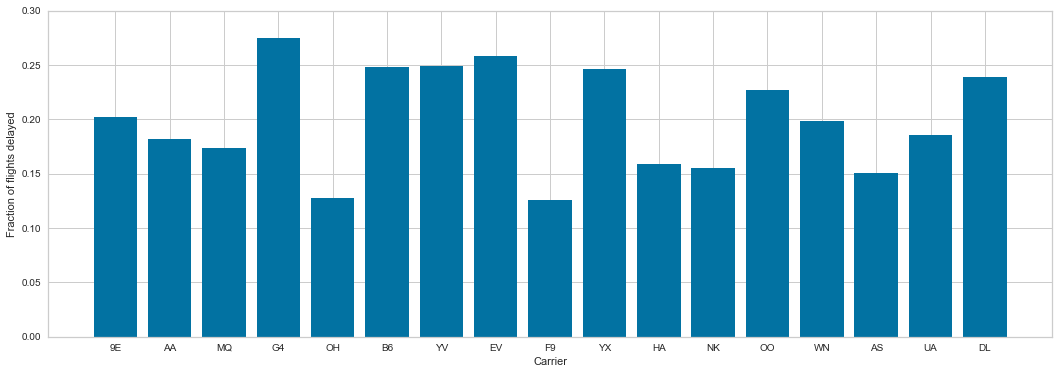

In [29]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['OP_UNIQUE_CARRIER'].unique(), height = df_red.groupby(['OP_UNIQUE_CARRIER']).mean()['ARR_DEL15'])
plt.ylim([0, 0.3])
plt.xlabel('Carrier')
plt.ylabel('Fraction of flights delayed')

Text(0, 0.5, 'Fraction of flights delayed')

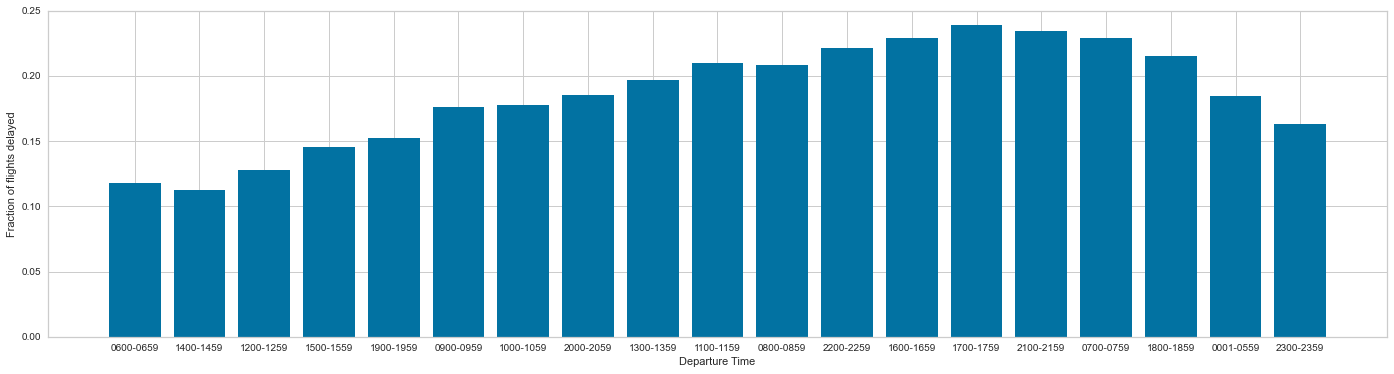

In [212]:
figure(num=None, figsize=(24, 6))
plt.bar(x = df_red['DEP_TIME_BLK'].unique(), height = df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'])
plt.ylim([0., 0.25])
plt.xlabel('Departure Time')
plt.ylabel('Fraction of flights delayed')

List below shows what departure time results in most delays proportionally--it can be seen that it's the 1800-18:59 time slot:

In [27]:
df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'].sort_values()

DEP_TIME_BLK
0600-0659    0.112813
0001-0559    0.118162
0700-0759    0.127854
0800-0859    0.145400
0900-0959    0.152186
2300-2359    0.162692
1000-1059    0.176263
1100-1159    0.177826
2200-2259    0.184900
1200-1259    0.185168
1300-1359    0.196801
1500-1559    0.208362
1400-1459    0.209567
2100-2159    0.214907
1600-1659    0.221165
2000-2059    0.228903
1700-1759    0.229099
1900-1959    0.234680
1800-1859    0.239034
Name: ARR_DEL15, dtype: float64

Lowest and Highest ratio of delayed flights by Destination shown below; do not fly to Ogden city as you have a 50% chance of being late:

In [213]:
df_red.groupby(['DEST']).mean()['ARR_DEL15'].sort_values()

DEST
ELM    0.000000
CPR    0.044118
LWS    0.047619
DRT    0.050847
BTM    0.051724
         ...   
HGR    0.400000
MKG    0.425532
MMH    0.440000
OGS    0.500000
OGD    0.500000
Name: ARR_DEL15, Length: 346, dtype: float64

Lowest and Highest ratio of delayed flights by Origin shown below; Ogden City again stands out:

In [214]:
#delayed_norm['ORIGIN'] = df_red['ORIGIN']
df_red.groupby(['ORIGIN']).mean()['ARR_DEL15'].sort_values()

ORIGIN
LYH    0.000000
PPG    0.000000
CPR    0.014706
LWS    0.031250
BRW    0.033333
         ...   
ACV    0.429825
VEL    0.434783
OWB    0.444444
OGD    0.500000
OGS    0.600000
Name: ARR_DEL15, Length: 346, dtype: float64

Let us check whether delayed departure translates to also delayed arrival:

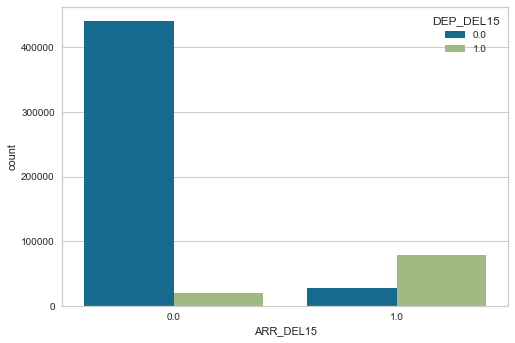

In [32]:
#Check by delay in departure
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DEP_DEL15'])

As expected, flights that leave late also (mostly) arrive late. Let us now look at distance traveled below:

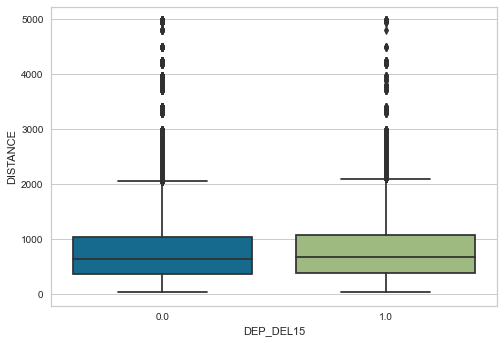

In [33]:
sb.boxplot('DEP_DEL15', 'DISTANCE', data=df_red, orient='v')

In [34]:
df_red.groupby(['DEP_DEL15']).mean()['DISTANCE']

DEP_DEL15
0.0    799.301073
1.0    817.114257
Name: DISTANCE, dtype: float64

In [35]:
df_red.groupby(['DEP_DEL15']).median()['DISTANCE']

DEP_DEL15
0.0    637.0
1.0    674.0
Name: DISTANCE, dtype: float64

There seems to be a slightly higher distance traveled for flights that were delayed. Let us do a t-test to check whether this difference is statistically significant

In [36]:
stats.ttest_ind(df_red[df_red['ARR_DEL15'] == 1]['DISTANCE'], df_red[df_red['ARR_DEL15'] == 0]['DISTANCE'], equal_var=False)

Ttest_indResult(statistic=2.5804047623776594, pvalue=0.009869350308986821)

It is significant!

Finally dummyfying variables for categorical variables: OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK', 'DAY_OF_MONTH', 'DAY_OF_WEEK and normalizing the 'DISTANCE

In [205]:
df_dum = pd.get_dummies(df_red, columns = ['ORIGIN', 
                                           'DEST', 
                                           'OP_UNIQUE_CARRIER', 
                                           'DEP_TIME_BLK', 
                                           'DAY_OF_MONTH',
                                            'DAY_OF_WEEK'])

In [206]:
mean = df_dum['DISTANCE'].mean()
std =  df_dum['DISTANCE'].std()
df_dum['DISTANCE'] = (df_dum['DISTANCE'] - mean)/std

In [207]:
df_dum.head()

,DEP_DEL15,ARR_DEL15,DISTANCE,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,...,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,0.0,0.0,-0.848173,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,-0.348448,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,-0.968039,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0,-0.978169,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.0,-0.377149,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Modeling <a id='Modeling'></a>

We will be implementing logistics regresion, decision tree,  random forest and adaboost classifier, to predict whether a flight will be delayed or not. Lastly, neural network by using keras will be used to learn about delays. 

## Baseline <a id='Baseline'></a>

Let us first estimate what a completely random estimate would give us (an estimate that does not rely on data science or fancy machine learning at all)
That is to say if we randomly guessed whether a flight would be late or not what our accuracy would be? Let's first get the proportion of flights that are late:

In [211]:
df_dum[df_dum['ARR_DEL15']==1].shape[0]/df_dum.shape[0]

0.18591674720785634

So if we randomly guessed a flight would be late we'd be correct 18.6% of the time; if we randomly guessed a flight would not be late then we'd be correct 81.4% of the time. Let's check whether our models beat this

## Logistic Regression <a id='Logistic-Regression'></a>

In [111]:
X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

In [113]:
lr_model = LogisticRegression(max_iter=1000, tol = 0.001,  verbose=1)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished


LogisticRegression(max_iter=1000, tol=0.001, verbose=1)

In [114]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [115]:
import time

time0 = time.time()
result = cross_val_score(lr_model,X_train,y_train, cv = cv)
time1 = time.time()

print('code took ' + str(time1 - time0) + ' seconds')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


code took 319.75836396217346 seconds


In [116]:
print(f'Lower Limit: {np.min(result)}')
print(f'Mean: {np.mean(result)}')
print(f'Upper Limit: {np.max(result)}')

Lower Limit: 0.9151144423123814
Mean: 0.9163866125287563
Upper Limit: 0.9170969075662324


In [117]:
pred = lr_model.predict(X_test)
pred_prob = lr_model.predict_proba(X_test)

In [119]:
print("Classification:\n",classification_report(y_test, pred, digits=3))

# print the area under the curve
print(f'AUC: {roc_auc_score(y_test,pred_prob[:,1])}')

Classification:
               precision    recall  f1-score   support

         0.0      0.942     0.957     0.950    230388
         1.0      0.799     0.742     0.769     52594

    accuracy                          0.917    282982
   macro avg      0.870     0.850     0.859    282982
weighted avg      0.915     0.917     0.916    282982

AUC: 0.8952169462174631


c:\python37\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



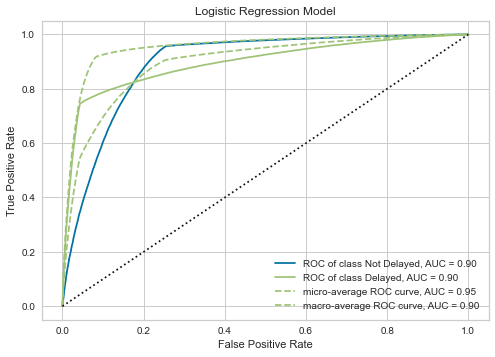

In [120]:
ax = plt.axes()
visualizer = ROCAUC(lr_model, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test)
ax.set_title('Logistic Regression Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Decision Tree Classifier <a id='Decision-Tree-Classifier'></a>

In [121]:
clf_dt = DecisionTreeClassifier(random_state = 0)
dt_model = clf_dt.fit(X_train, y_train)

In [122]:
y_pred = dt_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    230388
         1.0       0.70      0.67      0.68     52594

    accuracy                           0.88    282982
   macro avg       0.81      0.80      0.81    282982
weighted avg       0.88      0.88      0.88    282982



c:\python37\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



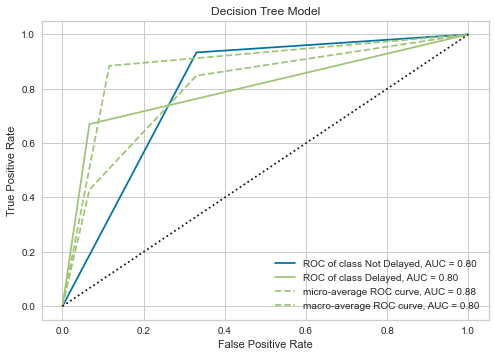

In [123]:
ax = plt.axes()
visualizer = ROCAUC(dt_model, 
                    ax = ax,
                    per_class = True,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Decision Tree Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Random Forest Classifier <a id='Random-Forest-Classifier'></a>

In [124]:
clf_rf=RandomForestClassifier(n_estimators=10)
rf_model = clf_rf.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.907244983779887


c:\python37\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



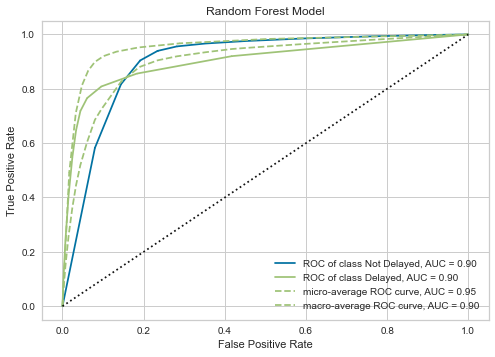

In [126]:
ax = plt.axes()
visualizer = ROCAUC(rf_model, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Random Forest Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## AdaBoost Classifier <a id='AdaBoost-Classifier'></a>


In [127]:
Adaboost = AdaBoostClassifier()
model_adaboost = Adaboost.fit(X_train, y_train)

In [128]:
from sklearn import metrics
y_pred = model_adaboost.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    230388
         1.0       0.80      0.74      0.77     52594

    accuracy                           0.92    282982
   macro avg       0.87      0.85      0.86    282982
weighted avg       0.92      0.92      0.92    282982



c:\python37\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



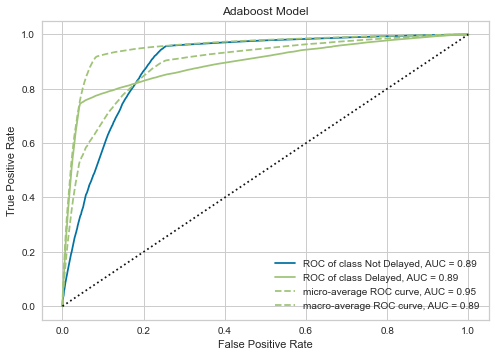

In [129]:
ax = plt.axes()
visualizer = ROCAUC(model_adaboost, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Adaboost Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Neural network model with Keras  <a id='nn'></a>

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


nn_model_s = Sequential()
nn_model_s.add(Dense(64, input_dim= X_train.shape[1], activation= 'relu'))
nn_model_s.add(Dense(8, input_dim= X_train.shape[1], activation= 'relu'))
nn_model_s.add(Dense(2, activation= 'softmax'))

nn_model_s.compile(loss= 'binary_crossentropy', 
              #optimizer= opt, 
              metrics= ['accuracy'])
history_s = nn_model_s.fit(X_train, y_train,validation_split = 0.5, epochs= 20, batch_size=128)



Epoch 1/20
1106/1106 [==============================] - 18s 16ms/step - loss: 0.2767 - accuracy: 0.9074 - val_loss: 0.2597 - val_accuracy: 0.9162
Epoch 2/20
1106/1106 [==============================] - 8s 8ms/step - loss: 0.2586 - accuracy: 0.9160 - val_loss: 0.2580 - val_accuracy: 0.9165
Epoch 3/20
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2562 - accuracy: 0.9160 - val_loss: 0.2563 - val_accuracy: 0.9170
Epoch 4/20
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2539 - accuracy: 0.9162 - val_loss: 0.2553 - val_accuracy: 0.9168
Epoch 5/20
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2515 - accuracy: 0.9164 - val_loss: 0.2579 - val_accuracy: 0.9165
Epoch 6/20
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2493 - accuracy: 0.9165 - val_loss: 0.2530 - val_accuracy: 0.9168
Epoch 7/20
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2471 - accuracy: 0.9166 - val_loss: 0.2518 - val_accurac

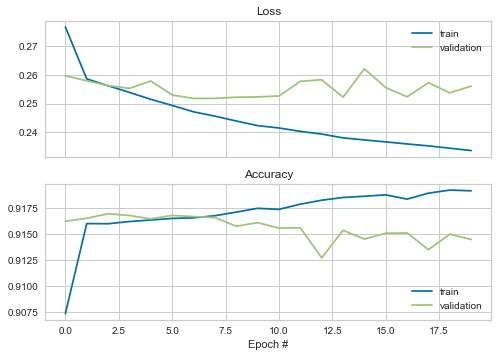

In [203]:
f, (ax1, ax2) = plt.subplots(2,1,sharex= True)
ax1.set_title('Loss')
ax1.plot(history_s.history['loss'], label='train')
ax1.plot(history_s.history['val_loss'], label='validation')
ax1.legend()
# plot accuracy during training
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch #')
ax2.plot(history_s.history['accuracy'], label='train')
ax2.plot(history_s.history['val_accuracy'], label='validation')
ax2.legend()
plt.show()

In [204]:
_, train_acc = nn_model_s.evaluate(X_train, y_train, verbose=0)
_, test_acc = nn_model_s.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.918, Test: 0.915


Overfitting starts almost immediately however it does not make the prediction accuracy much worse on the validation dataset. 2 epochs are recommended for the model to train

In [215]:
y_pred = nn_model_s.predict(X_test)
y_pred  = (y_pred > 0.5)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95    230687
           1       0.79      0.74      0.76     52295

   micro avg       0.91      0.91      0.91    282982
   macro avg       0.86      0.85      0.85    282982
weighted avg       0.91      0.91      0.91    282982
 samples avg       0.91      0.91      0.91    282982



## Summary <a id='Summary'></a>

Exploratory data analysis identifies cyclicity in flight delays with respect to week days and also identifies the biggest offending airlines and airports. It also identifies which departure time is most likely to result in delays.

With the exception of Decision Tree classifier which showed poorer results the rest of the predictive methods were similar in results. A precision of 0.74-0.8 is obtained in predicting whether a flight will be delayed or not.

The defaults parameters were applied in all the models. It's very likely that results may improve somewhat by optimizing them.